### CAPSTONE PROJECT ( IBM PROFESSIONAL DATA SCIENTIST CERTIFICATION) FOR COURSERA

### BATTLE OF NEIGHBORHOODS IN MELBOURNE, AUSTRALIA

With my data science skills I acquired from IBM course in coursera and also with the help of Foursquare API I wanted to analyze different cuisines available in Melbourne city and also wanted to know the top 10 cuisines for each of the places in and around Melbourne. Since, I recently migrated to Melbourne from India and I love trying different cuisines made me choose this for my Capstone project

For this project I obtained data from the below link
https://www.geonames.org/postal-codes/AU/VIC/victoria.html

#### Importing Libraries for Web Scraping and Analysis

In [1]:
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium=0.5.0 --yes

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import json
from geopy.geocoders import Nominatim
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### From the below steps, table is extracted from the postal code website of Melbourne and converted to a dataframe having rows and columns

In [3]:
link=requests.get("https://www.geonames.org/postal-codes/AU/VIC/victoria.html")

In [4]:
link.status_code

200

In [5]:
link.content

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd ">\n<html>\n<head>\n<title>Postal Codes Victoria, Australia</title>\n<link rel="search" type="application/opensearchdescription+xml" title="geonames" href="https://www.geonames.org/opensearch-description.xml">\n<link href="/geonames.ico" rel="shortcut icon" >\n<link rel="StyleSheet" href="/geonames.css" type="text/css" >\n</head>\n<body>\n<table id="topmenutable" cellpadding="0" cellspacing="0"><tr>\n<td class="topmenu">&nbsp;<a href="/" title="GeoName Home">&nbsp;GeoNames Home</a>&nbsp;|&nbsp;<a href="/postal-codes/" title="Postal Codes">Postal Codes</a>&nbsp;|&nbsp;<a href="/export/" title="Database Dump and Webservice API">Download / Webservice</a>&nbsp;|&nbsp;<a href="/about.html" title="About GeoNames">About</a>&nbsp;</td>\n<td class="topsearch">\n   <form class="topsearch" name="searchForm" method="get" action="/servlet/geonames" >\n\n      search <input class="topmenu" name="q"

In [6]:
soup = BeautifulSoup(link.content, 'lxml')

In [7]:
table = soup.find_all('table', class_ ='restable')


In [8]:
len(table)

1

In [9]:
table= pd.read_html(str(table))

In [10]:
type(table)

list

In [11]:
for rows in table:
    for columns in rows:
        print(columns)
        

0
1
2
3
4
5
6


In [12]:
table =table[0]

In [13]:
df = pd.DataFrame(table)

### EXPLORATORY DATA ANALYSIS

Once Dataframe is created, I cleaned the data by removing columns which does not give any information for analysis and renamed the column names for my convenience
After that I extracted columns having Latitude and Longitude values from table and joined it to the original table having other information.
The final table consists of Postal codes of Melbourne, Places(Borough), Neighborhoods, Latitude and Longitude values.

In [14]:
df= df.rename(columns=df.iloc[0]).drop(df.index[0])

In [15]:
df.head()

,nan,Place,Code,Country,Admin1,Admin2,Admin3
1,1.0,Melbourne,3000,Australia,Victoria,MELBOURNE CITY,NaN
2,NaN,-37.814/144.963,NaN,NaN,NaN,NaN,NaN
3,2.0,Melbourne,3004,Australia,Victoria,MELBOURNE CITY,NaN
4,NaN,-37.814/144.963,NaN,NaN,NaN,NaN,NaN
5,3.0,East Melbourne,3002,Australia,Victoria,MELBOURNE CITY,NaN


In [16]:
df.columns

Index([nan, 'Place', 'Code', 'Country', 'Admin1', 'Admin2', 'Admin3'], dtype='object')

In [17]:
import numpy as np
df.drop(np.nan,axis=1, inplace=True)
df.drop(['Country','Admin3'],axis=1, inplace=True)

In [18]:
df.head()

,Place,Code,Admin1,Admin2
1,Melbourne,3000,Victoria,MELBOURNE CITY
2,-37.814/144.963,NaN,NaN,NaN
3,Melbourne,3004,Victoria,MELBOURNE CITY
4,-37.814/144.963,NaN,NaN,NaN
5,East Melbourne,3002,Victoria,MELBOURNE CITY


In [19]:
df1 = df[1::2]

In [20]:
df1.head()

,Place,Code,Admin1,Admin2
2,-37.814/144.963,NaN,NaN,NaN
4,-37.814/144.963,NaN,NaN,NaN
6,-37.817/144.988,NaN,NaN,NaN
8,-37.823/144.964,NaN,NaN,NaN
10,-37.9/144.667,NaN,NaN,NaN


In [21]:
df_latlng= df1['Place'].reset_index().drop(['index'],axis=1)
df_latlng.head()

,Place
0,-37.814/144.963
1,-37.814/144.963
2,-37.817/144.988
3,-37.823/144.964
4,-37.9/144.667


In [22]:
lat=[]
lon=[]

for row in df_latlng['Place']:
    try:
        lat.append(row.split('/')[0])
        lon.append(row.split('/')[1])
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)

df_latlng['latitude']= lat
df_latlng['longitude'] = lon

In [23]:
df_latlng.drop(['Place'], axis=1, inplace= True)

In [24]:
df_latlng.head()

,latitude,longitude
0,-37.814,144.963
1,-37.814,144.963
2,-37.817,144.988
3,-37.823,144.964
4,-37.9,144.667


In [25]:
neighborhoods = df.iloc[::2]

In [26]:
neighborhoods=neighborhoods.reset_index()

In [27]:
neighborhoods.drop(['index'],axis=1,inplace=True)

In [28]:
neighborhoods

,Place,Code,Admin1,Admin2
0,Melbourne,3000,Victoria,MELBOURNE CITY
1,Melbourne,3004,Victoria,MELBOURNE CITY
2,East Melbourne,3002,Victoria,MELBOURNE CITY
3,Southbank,3006,Victoria,MOORABBIN
4,Werribee,3030,Victoria,MELB NORTH WEST
5,Tullamarine,3043,Victoria,FOOTSCRAY
6,Carlton,3053,Victoria,MELB NORTH WEST
7,Reservoir,3073,Victoria,PRESTON
8,Hawthorn,3122,Victoria,HAWTHORN
9,Wantirna,3152,Victoria,FERNTREE GULLY


In [29]:
old_names = ['Place','Code','Admin1','Admin2']
new_names = ['Neighborhood','Postcode','State','Place']
neighborhoods.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [30]:
neighborhoods.dropna(axis=0,how='all', inplace=True)
neighborhoods

,Neighborhood,Postcode,State,Place
0,Melbourne,3000,Victoria,MELBOURNE CITY
1,Melbourne,3004,Victoria,MELBOURNE CITY
2,East Melbourne,3002,Victoria,MELBOURNE CITY
3,Southbank,3006,Victoria,MOORABBIN
4,Werribee,3030,Victoria,MELB NORTH WEST
5,Tullamarine,3043,Victoria,FOOTSCRAY
6,Carlton,3053,Victoria,MELB NORTH WEST
7,Reservoir,3073,Victoria,PRESTON
8,Hawthorn,3122,Victoria,HAWTHORN
9,Wantirna,3152,Victoria,FERNTREE GULLY


In [31]:
neighborhoods['Place'].replace(np.nan,neighborhoods['Neighborhood'],inplace=True)

In [32]:
neighborhoods['Place'] = [str(i).title() for i in neighborhoods['Place']]

In [33]:
neighborhoods.isna().sum()

Neighborhood    0
Postcode        0
State           0
Place           0
dtype: int64

In [34]:
type(neighborhoods)

pandas.core.frame.DataFrame

In [35]:
neighborhoods.head()

,Neighborhood,Postcode,State,Place
0,Melbourne,3000,Victoria,Melbourne City
1,Melbourne,3004,Victoria,Melbourne City
2,East Melbourne,3002,Victoria,Melbourne City
3,Southbank,3006,Victoria,Moorabbin
4,Werribee,3030,Victoria,Melb North West


In [36]:
df_mel =pd.concat([neighborhoods,df_latlng], axis=1)
df_mel

,Neighborhood,Postcode,State,Place,latitude,longitude
0,Melbourne,3000,Victoria,Melbourne City,-37.814,144.963
1,Melbourne,3004,Victoria,Melbourne City,-37.814,144.963
2,East Melbourne,3002,Victoria,Melbourne City,-37.817,144.988
3,Southbank,3006,Victoria,Moorabbin,-37.823,144.964
4,Werribee,3030,Victoria,Melb North West,-37.9,144.667
5,Tullamarine,3043,Victoria,Footscray,-37.701,144.881
6,Carlton,3053,Victoria,Melb North West,-37.8,144.967
7,Reservoir,3073,Victoria,Preston,-37.717,145
8,Hawthorn,3122,Victoria,Hawthorn,-37.82,145.036
9,Wantirna,3152,Victoria,Ferntree Gully,-37.85,145.217


In [37]:
df_postcodes = df_mel.groupby(['Postcode','Place','latitude','longitude']).Neighborhood.agg([('Neighborhood', ', '.join)])
df_postcodes.reset_index(inplace=True)
df_postcodes.head()

,Postcode,Place,latitude,longitude,Neighborhood
0,3000,Melbourne City,-37.814,144.963,Melbourne
1,3001,Melbourne City,-37.814,144.963,Melbourne
2,3002,Melbourne City,-37.817,144.988,East Melbourne
3,3003,Melbourne City,-37.81,144.95,West Melbourne
4,3004,Melbourne City,-37.814,144.963,Melbourne


Using Folium library, Choropleth map is obtained by passing latitude and longitude values from table to the below code

In [38]:
latitude=-37.8142176
longitude=144.9631608

map_melbourne = folium.Map(location=[latitude, longitude], zoom_start =12)

for lat, lng, borough, neigh in zip(df_postcodes['latitude'], df_postcodes['longitude'],df_postcodes['Place'],df_postcodes['Neighborhood']):
    label="{},{}".format(latitude,longitude) 
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_melbourne)  
    
    
map_melbourne

From the above map, We can view all the Neighborhoods based on the postal codes and places(borough).

From the below code, I have excluded rows having 'Vic' as it is a regional Victoria. I wanted to analyse only the Melbourne and its suburbs.

In [39]:
df_postcodes = df_postcodes[~df_postcodes.Place.str.contains("Vic")]

In [40]:
df_postcodes.head()

,Postcode,Place,latitude,longitude,Neighborhood
0,3000,Melbourne City,-37.814,144.963,Melbourne
1,3001,Melbourne City,-37.814,144.963,Melbourne
2,3002,Melbourne City,-37.817,144.988,East Melbourne
3,3003,Melbourne City,-37.81,144.95,West Melbourne
4,3004,Melbourne City,-37.814,144.963,Melbourne


In [41]:
df_postcodes

,Postcode,Place,latitude,longitude,Neighborhood
0,3000,Melbourne City,-37.814,144.963,Melbourne
1,3001,Melbourne City,-37.814,144.963,Melbourne
2,3002,Melbourne City,-37.817,144.988,East Melbourne
3,3003,Melbourne City,-37.81,144.95,West Melbourne
4,3004,Melbourne City,-37.814,144.963,Melbourne
5,3004,St Kilda Road Central,-37.814,144.963,St Kilda Road Central
6,3004,St Kilda Road Melbourne,-37.814,144.963,St Kilda Road Melbourne
7,3005,Melbourne City,-37.815,144.963,World Trade Centre
8,3006,Moorabbin,-37.823,144.964,Southbank
9,3006,South Wharf,-37.825,144.952,South Wharf


In [42]:
address = 'Melbourne, Australia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

The geograpical coordinate are -37.8142176, 144.9631608.


In [43]:
neighborhood_lat =-37.8142176 
neighborhood_long= 144.9631608

In [44]:
CLIENT_ID = 'LZ5BQM4R5Z1LVWWMNOEWTNGOGOGZGWA1LQYYCHI1PRE0PZEY' # your Foursquare ID
CLIENT_SECRET = 'YEFFJ5XW4WHMVID2YB0YGL4WTMZENBAQ5I3NIZJZW52PZER5' # your Foursquare Secret
VERSION = '20190524' # Foursquare API version
radius=1000
LIMIT=100


In [45]:
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=LZ5BQM4R5Z1LVWWMNOEWTNGOGOGZGWA1LQYYCHI1PRE0PZEY&client_secret=YEFFJ5XW4WHMVID2YB0YGL4WTMZENBAQ5I3NIZJZW52PZER5&v=20190524&ll=-37.8142176,144.9631608&radius=1000&limit=100'

In [46]:
# results display is hidden for report simplification 
results = requests.get(url).json()
#results

In [47]:
results

{'meta': {'code': 200, 'requestId': '5cec92261ed21914c0f8b115'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Melbourne CBD',
  'headerFullLocation': 'Melbourne CBD, Melbourne',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 247,
  'suggestedBounds': {'ne': {'lat': -37.80521759099999,
    'lng': 144.97453190378462},
   'sw': {'lat': -37.82321760900001, 'lng': 144.95178969621537}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54631f6e498ed0dde017e53c',
       'name': 'Tipo 00',
       'location': {'address': '361 Little Bourke St',
        'lat': -37.81352651659617,
        'lng': 144.96197769842925,
        'labeledLatLngs': [{'label': 'display',
          '

### After getting only Neighborhoods of in and around Melbourne , we again visualize it using folium maps

In [48]:
latitude=-37.8142176
longitude=144.9631608

map_melbourne = folium.Map(location=[latitude, longitude], zoom_start =12)

for lat, lng, borough, neigh in zip(df_postcodes['latitude'], df_postcodes['longitude'],df_postcodes['Place'],df_postcodes['Neighborhood']):
    label="{},{}".format(latitude,longitude) 
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_melbourne)  
    
    
map_melbourne

### The below function is for category type. The categories are obtained based on the venues

In [49]:
def get_category_type(row):
    '''
    Helper code to get the category type
    '''
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [50]:
Mel_venues = results['response']['groups'][0]['items']
Mel_nearby = json_normalize(Mel_venues)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Mel_nearby = Mel_nearby.loc[:, filtered_columns]
Mel_nearby['venue.categories'] = Mel_nearby.apply(get_category_type, axis = 1)
Mel_nearby.columns = [col.split(".")[-1] for col in Mel_nearby.columns]
Mel_nearby.head()

,name,categories,lat,lng
0,Tipo 00,Italian Restaurant,-37.813527,144.961978
1,Brother Baba Budan,Coffee Shop,-37.813445,144.962137
2,Kirk's Wine Bar,Wine Bar,-37.813661,144.961351
3,Beneath Driver Lane,Cocktail Bar,-37.813086,144.963119
4,Koko Black,Dessert Shop,-37.814485,144.964033


### This function gives us the nearby venues of Neighborhoods based on the Radius of 1000m and Limited to 100 venues

In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    '''
    This helper function returns the nearby venues
    '''
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_Mel = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_Mel.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_Mel)

### Nearby venues are obtained based on Neighborhood, Latitude and Longitude values. And then Onehot encoding is applied based on the venue categories.

In [52]:
Mel_venues = getNearbyVenues(names=df_postcodes['Neighborhood'],
                                   latitudes=df_postcodes['latitude'],
                                   longitudes=df_postcodes['longitude']
                                  )

Melbourne
Melbourne
East Melbourne
West Melbourne
Melbourne
St Kilda Road Central
St Kilda Road Melbourne
World Trade Centre
Southbank
South Wharf
Docklands
Footscray
Maidstone
Brooklyn
Yarraville
Williamstown
Williamstown North
Altona
Braybrook
Albion
Sunshine
Glengala
Sunshine North
Sunshine West
St Albans
Ardeer
Deer Park East
Burnside Heights
Deer Park North
Cairnlea
Deer Park
Ravenhall
Mambourin
Altona East
Altona Gate
Altona North
Laverton North
Williams Landing
Cocoroc
Werribee
Quandong
Werribee South
Kensington
Flemington
Keilor East
Avondale Heights
Keilor
Calder Park
Delahey
Taylors Hill
Taylors Lakes
Keilor Lodge
Watergardens
Moonee Ponds
Essendon West
Essendon
Cross Keys
Essendon Fields
Strathmore
Essendon North
Airport West
Niddrie North
Tullamarine
Pascoe Vale
Oak Park
Broadmeadows
Coolaroo
Attwood
Westmeadows
Royal Melbourne Hospital
North Melbourne
Melbourne University
Parkville
Carlton
Carlton North
Princes Hill
Brunswick South
Moonee Vale
Moreland West
Brunswick West


In [53]:
Mel_venues.shape

(6196, 7)

In [54]:
Mel_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melbourne,-37.814,144.963,Tipo 00,-37.813527,144.961978,Italian Restaurant
1,Melbourne,-37.814,144.963,Brother Baba Budan,-37.813445,144.962137,Coffee Shop
2,Melbourne,-37.814,144.963,Kirk's Wine Bar,-37.813661,144.961351,Wine Bar
3,Melbourne,-37.814,144.963,Beneath Driver Lane,-37.813086,144.963119,Cocktail Bar
4,Melbourne,-37.814,144.963,Koko Black,-37.814485,144.964033,Dessert Shop
5,Melbourne,-37.814,144.963,B'cos Brazil,-37.815486,144.963085,Brazilian Restaurant
6,Melbourne,-37.814,144.963,Chuckle Park,-37.815075,144.963908,Bar
7,Melbourne,-37.814,144.963,Calia,-37.812724,144.963930,Japanese Restaurant
8,Melbourne,-37.814,144.963,The Little Mule,-37.813750,144.962460,Café
9,Melbourne,-37.814,144.963,Manchester Press,-37.813740,144.962132,Café


In [55]:
Mel_onehot = pd.get_dummies(Mel_venues[['Venue Category']], prefix = '', prefix_sep = "")

Mel_onehot['Neighborhood'] = Mel_venues['Neighborhood']

columns = [Mel_onehot.columns[-1]] + list(Mel_onehot.columns[:-1])
Mel_onehot = Mel_onehot[columns]

Mel_onehot.head()

,Zoo Exhibit,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yunnan Restaurant,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
Mel_grouped = Mel_onehot.groupby('Neighborhood').mean().reset_index()
Mel_grouped.head()

,Neighborhood,Zoo Exhibit,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Antique Shop,Aquarium,Arcade,...,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Yunnan Restaurant,Zoo
0,Abbotsford,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Airport West,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Albion,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alphington,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Altona,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### In the below cell , I have obtained rows having only restaurant categories in it and filtered out so that we can examine only restaurants in all venues

In [57]:
Mel_grouped_neighbor = Mel_grouped['Neighborhood']
Mel_grouped = Mel_grouped.loc[:, Mel_grouped.columns.str.endswith('Restaurant')]
Mel_grouped.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.018868,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [58]:
Mel_grouped['Neighborhood'] = Mel_grouped_neighbor
Mel_grouped.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,...,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant,Neighborhood
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.018868,0.0,0.0,Abbotsford
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,Airport West
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,Albion
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0,Alphington
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,Altona


In [59]:
Mel_col = list(Mel_grouped)
Mel_col.insert(0, Mel_col.pop(Mel_col.index('Neighborhood')))
Mel_grouped = Mel_grouped.loc[:, Mel_col]
Mel_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yunnan Restaurant
0,Abbotsford,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.018868,0.000000,0.0
1,Airport West,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,Albion,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,Alphington,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.076923,0.0,0.000000,0.000000,0.000000,0.0
4,Altona,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
5,Altona East,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
6,Altona Gate,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7,Altona North,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.071429,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
8,Ardeer,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
9,Arthurs Creek,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


### Top 5 restaurants with frequencies are obtained for all venues

In [60]:
num_top_venues = 5

for hood  in Mel_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Mel_grouped[Mel_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbotsford----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.02
1            Japanese Restaurant  0.02
2             Chinese Restaurant  0.02
3          Sri Lankan Restaurant  0.02
4               Greek Restaurant  0.02


----Airport West----
                       venue  freq
0          Afghan Restaurant   0.0
1  South American Restaurant   0.0
2   Mediterranean Restaurant   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----Albion----
                       venue  freq
0  Latin American Restaurant  0.11
1  South American Restaurant  0.00
2   Mediterranean Restaurant  0.00
3         Mexican Restaurant  0.00
4  Middle Eastern Restaurant  0.00


----Alphington----
                       venue  freq
0            Thai Restaurant  0.08
1       Fast Food Restaurant  0.08
2          Afghan Restaurant  0.00
3  South American Restaurant  0.00
4         Mexican Restaurant  0.00


----Altona----
                       venue  freq
0   

                   venue  freq
0       Asian Restaurant  0.05
1  Australian Restaurant  0.05
2    Japanese Restaurant  0.05
3        Thai Restaurant  0.05
4      Afghan Restaurant  0.00


----Cairnlea----
                     venue  freq
0         Asian Restaurant   0.1
1               Restaurant   0.1
2       Seafood Restaurant   0.1
3        Afghan Restaurant   0.0
4  South Indian Restaurant   0.0


----Calder Park----
                       venue  freq
0          Afghan Restaurant   0.0
1  South American Restaurant   0.0
2   Mediterranean Restaurant   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----Camberwell----
                 venue  freq
0  Japanese Restaurant   0.1
1   Italian Restaurant   0.1
2    Afghan Restaurant   0.0
3     Malay Restaurant   0.0
4   Mexican Restaurant   0.0


----Camberwell South----
                       venue  freq
0            Thai Restaurant  0.07
1          Afghan Restaurant  0.00
2  South American Restaurant  0.00
3  

                       venue  freq
0           Asian Restaurant  0.14
1  Middle Eastern Restaurant  0.07
2          Afghan Restaurant  0.00
3    South Indian Restaurant  0.00
4         Mexican Restaurant  0.00


----Gilberton----
                       venue  freq
0      Australian Restaurant  0.05
1       Fast Food Restaurant  0.05
2          Afghan Restaurant  0.00
3  South American Restaurant  0.00
4         Mexican Restaurant  0.00


----Glenferrie South----
                       venue  freq
0           Asian Restaurant  0.04
1            Thai Restaurant  0.04
2         Chinese Restaurant  0.04
3          Afghan Restaurant  0.00
4  South American Restaurant  0.00


----Glengala----
                   venue  freq
0   Fast Food Restaurant  0.17
1       Malay Restaurant  0.03
2  Vietnamese Restaurant  0.03
3     Chinese Restaurant  0.03
4             Restaurant  0.03


----Greensborough----
                       venue  freq
0       Fast Food Restaurant  0.08
1  Middle Eastern Restau

                           venue  freq
0          Vietnamese Restaurant  0.04
1  Vegetarian / Vegan Restaurant  0.04
2                Thai Restaurant  0.03
3             Mexican Restaurant  0.01
4              Korean Restaurant  0.01


----Northcote South----
                           venue  freq
0          Vietnamese Restaurant  0.04
1  Vegetarian / Vegan Restaurant  0.04
2                Thai Restaurant  0.03
3             Mexican Restaurant  0.01
4              Korean Restaurant  0.01


----Nunawading----
                  venue  freq
0       Thai Restaurant  0.04
1  Fast Food Restaurant  0.04
2      Malay Restaurant  0.04
3     Afghan Restaurant  0.00
4    Seafood Restaurant  0.00


----Oak Park----
                       venue  freq
0       Fast Food Restaurant   0.5
1          Afghan Restaurant   0.0
2  South American Restaurant   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----Oaklands Junction----
                       venue  freq
0          Af

                       venue  freq
0           Greek Restaurant   0.2
1  Middle Eastern Restaurant   0.1
2          Afghan Restaurant   0.0
3  South American Restaurant   0.0
4         Mexican Restaurant   0.0


----Thomastown----
                       venue  freq
0  Middle Eastern Restaurant  0.06
1           Halal Restaurant  0.06
2       Fast Food Restaurant  0.06
3          Afghan Restaurant  0.00
4           Malay Restaurant  0.00


----Thornbury----
                       venue  freq
0      Australian Restaurant  0.05
1         Italian Restaurant  0.05
2  Middle Eastern Restaurant  0.02
3            Thai Restaurant  0.02
4           Tapas Restaurant  0.02


----Tullamarine----
                       venue  freq
0      Portuguese Restaurant  0.07
1       Fast Food Restaurant  0.07
2          Afghan Restaurant  0.00
3  South American Restaurant  0.00
4         Mexican Restaurant  0.00


----Vermont----
                venue  freq
0    Asian Restaurant  0.04
1     Thai Restaurant  

### The below code is to obtain only top 10 categories of cuisines in all suburbs based on likes received and most common venue in each Neighborhoods

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
Mel_restaurants = pd.DataFrame(columns=columns)
Mel_restaurants['Neighborhood'] = Mel_grouped['Neighborhood']

for ind in np.arange(Mel_grouped.shape[0]):
    Mel_restaurants.iloc[ind, 1:] = return_most_common_venues(Mel_grouped.iloc[ind, :], num_top_venues)

Mel_restaurants

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Abbotsford,Vegetarian / Vegan Restaurant,Japanese Restaurant,Greek Restaurant,Sri Lankan Restaurant,Chinese Restaurant,Yunnan Restaurant,Egyptian Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant
1,Airport West,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
2,Albion,Latin American Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
3,Alphington,Thai Restaurant,Fast Food Restaurant,Yunnan Restaurant,Eastern European Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
4,Altona,Italian Restaurant,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
5,Altona East,Fast Food Restaurant,Sushi Restaurant,Portuguese Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
6,Altona Gate,Fast Food Restaurant,Sushi Restaurant,Portuguese Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
7,Altona North,Fast Food Restaurant,Sushi Restaurant,Portuguese Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
8,Ardeer,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
9,Arthurs Creek,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant


### K - means Clustering Algorithm is used to determine clusters having similarities among venues and then joined those values to a table containing venues and most common restaurants.

In [63]:
kclusters = 5

Mel_grouped_clustering = Mel_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Mel_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 4, 2, 4, 4, 4, 1, 1, 2, 1, 2, 4, 1, 1, 3, 1, 1, 1, 4, 4,
       3, 3, 1, 1, 4, 1, 1, 1, 1, 1, 2, 2, 4, 4, 1, 4, 1, 3, 1, 2, 1, 4,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 4, 1, 3, 1, 1, 4, 4, 1, 1,
       2, 4, 2, 2, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 3, 3, 1, 1, 4, 4,
       3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 3, 0,
       1, 4, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 2, 4, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 4, 2, 1, 4, 4, 1, 4, 1,
       1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1])

In [64]:
type(kmeans.labels_[0])

numpy.int32

In [65]:
Mel_restaurants.insert(0,'Cluster Label', kmeans.labels_)

Melbourne_merged = df_postcodes

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Melbourne_merged = Melbourne_merged.join(Mel_restaurants.set_index('Neighborhood'), on='Neighborhood')

Melbourne_merged.head()


,Postcode,Place,latitude,longitude,Neighborhood,Cluster Label,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,3000,Melbourne City,-37.814,144.963,Melbourne,1.0,Italian Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Dumpling Restaurant,Tapas Restaurant,Argentinian Restaurant
1,3001,Melbourne City,-37.814,144.963,Melbourne,1.0,Italian Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Dumpling Restaurant,Tapas Restaurant,Argentinian Restaurant
2,3002,Melbourne City,-37.817,144.988,East Melbourne,1.0,Thai Restaurant,Vietnamese Restaurant,Australian Restaurant,Italian Restaurant,Restaurant,Japanese Restaurant,Greek Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant
3,3003,Melbourne City,-37.81,144.95,West Melbourne,1.0,Korean Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Japanese Restaurant,Indian Restaurant,Indonesian Restaurant,Tapas Restaurant,Thai Restaurant,Australian Restaurant
4,3004,Melbourne City,-37.814,144.963,Melbourne,1.0,Italian Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Dumpling Restaurant,Tapas Restaurant,Argentinian Restaurant


In [66]:
Melbourne_merged[Melbourne_merged['1st Most Common Restaurant'] == 'Indian Restaurant']

,Postcode,Place,latitude,longitude,Neighborhood,Cluster Label,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
39,3030,Melb North West,-37.9,144.667,Werribee,1.0,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Yunnan Restaurant,Ethiopian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant
80,3056,Brunswick Lower,-37.767,144.967,Brunswick Lower,1.0,Indian Restaurant,Thai Restaurant,Italian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,South American Restaurant,Indonesian Restaurant,Japanese Restaurant
81,3056,Brunswick North,-37.767,144.967,Brunswick North,1.0,Indian Restaurant,Thai Restaurant,Italian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,South American Restaurant,Indonesian Restaurant,Japanese Restaurant
82,3056,Preston,-37.767,144.967,Brunswick,1.0,Indian Restaurant,Thai Restaurant,Italian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Portuguese Restaurant,South American Restaurant,Indonesian Restaurant,Japanese Restaurant


In [67]:
#Melbourne = Melbourne_merged['Cluster Label'].round().astype(int)
Melbourne_merged["Cluster Label"]= Melbourne_merged["Cluster Label"].fillna(0).astype(int)

In [68]:
Melbourne_merged["Cluster Label"].dtype

dtype('int32')

In [69]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Melbourne_merged['latitude'], Melbourne_merged['longitude'], Melbourne_merged['Neighborhood'], Melbourne_merged['Cluster Label']):
    label = folium.Popup(str(poi) + 'Cluster Label' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Each Clusters are taken for better Understanding

In [70]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 0, Melbourne_merged.columns[[1] + list(range(5, Melbourne_merged.shape[1]))]]

,Place,Cluster Label,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
32,Mambourin,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Melb North West,0,Fast Food Restaurant,Portuguese Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
40,Quandong,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Footscray,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Preston,0,Fast Food Restaurant,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
89,Melb North West,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 1, Melbourne_merged.columns[[1] + list(range(5, Melbourne_merged.shape[1]))]]

,Place,Cluster Label,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Melbourne City,1,Italian Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Dumpling Restaurant,Tapas Restaurant,Argentinian Restaurant
1,Melbourne City,1,Italian Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Dumpling Restaurant,Tapas Restaurant,Argentinian Restaurant
2,Melbourne City,1,Thai Restaurant,Vietnamese Restaurant,Australian Restaurant,Italian Restaurant,Restaurant,Japanese Restaurant,Greek Restaurant,Sushi Restaurant,Asian Restaurant,Indian Restaurant
3,Melbourne City,1,Korean Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Japanese Restaurant,Indian Restaurant,Indonesian Restaurant,Tapas Restaurant,Thai Restaurant,Australian Restaurant
4,Melbourne City,1,Italian Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Dumpling Restaurant,Tapas Restaurant,Argentinian Restaurant
5,St Kilda Road Central,1,Italian Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Dumpling Restaurant,Tapas Restaurant,Argentinian Restaurant
6,St Kilda Road Melbourne,1,Italian Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Dumpling Restaurant,Tapas Restaurant,Argentinian Restaurant
7,Melbourne City,1,Italian Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Australian Restaurant,Indonesian Restaurant,Middle Eastern Restaurant,Dumpling Restaurant,Japanese Restaurant,Brazilian Restaurant
8,Moorabbin,1,Italian Restaurant,Australian Restaurant,Japanese Restaurant,French Restaurant,Spanish Restaurant,Seafood Restaurant,Asian Restaurant,Brazilian Restaurant,Malay Restaurant,Chinese Restaurant
9,South Wharf,1,Japanese Restaurant,Seafood Restaurant,Australian Restaurant,Italian Restaurant,Thai Restaurant,French Restaurant,Kebab Restaurant,Korean Restaurant,Vietnamese Restaurant,Mexican Restaurant


In [72]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 2, Melbourne_merged.columns[[1] + list(range(5, Melbourne_merged.shape[1]))]]

,Place,Cluster Label,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
12,Footscray,2,Latin American Restaurant,Italian Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
16,Williamstown North,2,Seafood Restaurant,Italian Restaurant,Yunnan Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant,Filipino Restaurant
17,Footscray,2,Italian Restaurant,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant,French Restaurant
61,Niddrie North,2,Italian Restaurant,Portuguese Restaurant,Japanese Restaurant,Thai Restaurant,Australian Restaurant,Sushi Restaurant,Egyptian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
67,Melb North West,2,Italian Restaurant,Chinese Restaurant,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
70,Melbourne City,2,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Vietnamese Restaurant,Indian Restaurant,Malay Restaurant,French Restaurant,Modern European Restaurant,Persian Restaurant
71,Melb North West,2,Italian Restaurant,Asian Restaurant,Sri Lankan Restaurant,Fast Food Restaurant,South American Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant
73,Melb North West,2,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Vietnamese Restaurant,Indian Restaurant,Malay Restaurant,French Restaurant,Modern European Restaurant,Persian Restaurant
76,Brunswick South,2,Italian Restaurant,Asian Restaurant,Sri Lankan Restaurant,Fast Food Restaurant,South American Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant
77,Moonee Vale,2,Italian Restaurant,Asian Restaurant,Sri Lankan Restaurant,Fast Food Restaurant,South American Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant


In [73]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 3, Melbourne_merged.columns[[1] + list(range(5, Melbourne_merged.shape[1]))]]

,Place,Cluster Label,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
11,Footscray,3,Vietnamese Restaurant,Asian Restaurant,African Restaurant,Portuguese Restaurant,French Restaurant,American Restaurant,Italian Restaurant,Malay Restaurant,Restaurant,Fast Food Restaurant
24,Footscray,3,Vietnamese Restaurant,Asian Restaurant,Portuguese Restaurant,Ethiopian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
29,Footscray,3,Seafood Restaurant,Asian Restaurant,Restaurant,Egyptian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
30,Footscray,3,Vietnamese Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Restaurant,Ethiopian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
105,Preston,3,Asian Restaurant,Fast Food Restaurant,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
141,Greythorn,3,Asian Restaurant,Chinese Restaurant,Restaurant,Yunnan Restaurant,Ethiopian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
142,Hawthorn,3,Asian Restaurant,Chinese Restaurant,Restaurant,Yunnan Restaurant,Ethiopian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
173,Box Hill Central,3,Chinese Restaurant,Asian Restaurant,Dumpling Restaurant,Korean Restaurant,Vietnamese Restaurant,Szechuan Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Taiwanese Restaurant,Sushi Restaurant
174,Ferntree Gully,3,Chinese Restaurant,Asian Restaurant,Dumpling Restaurant,Korean Restaurant,Vietnamese Restaurant,Sushi Restaurant,Szechuan Restaurant,Middle Eastern Restaurant,Malay Restaurant,Restaurant
181,Ferntree Gully,3,Asian Restaurant,Middle Eastern Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant


In [74]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 4, Melbourne_merged.columns[[1] + list(range(5, Melbourne_merged.shape[1]))]]

,Place,Cluster Label,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
20,Footscray,4,Fast Food Restaurant,Vietnamese Restaurant,Chinese Restaurant,Malay Restaurant,Filipino Restaurant,Restaurant,Afghan Restaurant,Austrian Restaurant,Argentinian Restaurant,Japanese Restaurant
21,Glengala,4,Fast Food Restaurant,Vietnamese Restaurant,Malay Restaurant,Filipino Restaurant,Chinese Restaurant,Restaurant,Ethiopian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant
27,Burnside Heights,4,Thai Restaurant,Fast Food Restaurant,Yunnan Restaurant,Eastern European Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
31,Ravenhall,4,Fast Food Restaurant,Italian Restaurant,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
33,Altona East,4,Fast Food Restaurant,Sushi Restaurant,Portuguese Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
34,Altona Gate,4,Fast Food Restaurant,Sushi Restaurant,Portuguese Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
35,Footscray,4,Fast Food Restaurant,Sushi Restaurant,Portuguese Restaurant,Yunnan Restaurant,Egyptian Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant
44,Footscray,4,Fast Food Restaurant,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
45,Footscray,4,Fast Food Restaurant,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant,Greek Restaurant
48,Footscray,4,Asian Restaurant,Fast Food Restaurant,Yunnan Restaurant,Egyptian Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Indian Restaurant,Halal Restaurant


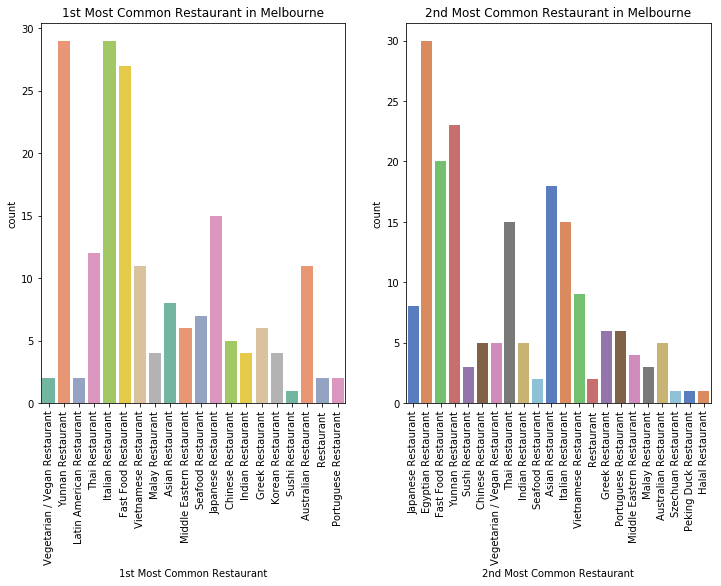

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 7))
ax1 = sns.countplot(x = '1st Most Common Restaurant', data = Mel_restaurants, 
                    palette = 'Set2', ax = ax1)
ax1.set_title('1st Most Common Restaurant in Melbourne')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2 = sns.countplot(x = '2nd Most Common Restaurant', data = Mel_restaurants, 
                    palette = 'muted', ax = ax2)
ax2.set_title('2nd Most Common Restaurant in Melbourne')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()